In [8]:
from google.colab import files
import io, pandas as pd

# Upload your dataset
uploaded = files.upload()

# Read it into pandas
fname = next(iter(uploaded))   # gets the filename
data = pd.read_excel(io.BytesIO(uploaded[fname]))


Saving Raisin_Dataset.xlsx to Raisin_Dataset (2).xlsx


In [9]:
data.head()        # first 5 rows
data.shape         # rows, columns
data['Class'].value_counts()  # how many raisins of each type


,count
Class,
Kecimen,450
Besni,450


In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Encode the class (Kecimen = 0, Besni = 1)
le = LabelEncoder()
data['Class_enc'] = le.fit_transform(data['Class'])
print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

# Features (X) and target (y)
X = data.drop(columns=['Class', 'Class_enc'])   # remove Class columns, keep numeric
y = data['Class_enc']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train size:", X_train.shape, " Test size:", X_test.shape)


Label mapping: {'Besni': np.int64(0), 'Kecimen': np.int64(1)}
Train size: (720, 7)  Test size: (180, 7)


In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Pipeline: scale features -> logistic regression
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=2000, random_state=42))
])

# Cross-validation on training data
cv_scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy')
print("CV scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())


CV scores: [0.79166667 0.88888889 0.86111111 0.86111111 0.91666667]
Mean CV accuracy: 0.8638888888888889


In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Fit the model
pipe.fit(X_train, y_train)

# Predict on test data
y_pred = pipe.predict(X_test)

# Accuracy
print("Test Accuracy:", accuracy_score(y_test, y_pred))

# Detailed performance
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Test Accuracy: 0.8888888888888888

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.83      0.88        90
           1       0.85      0.94      0.89        90

    accuracy                           0.89       180
   macro avg       0.89      0.89      0.89       180
weighted avg       0.89      0.89      0.89       180



Saving Raisin_Dataset.xlsx to Raisin_Dataset (3).xlsx
Shape: (900, 8)


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen



Class counts:
 Class
Kecimen    450
Besni      450
Name: count, dtype: int64
Label mapping: {'Besni': np.int64(0), 'Kecimen': np.int64(1)}
Train size: (720, 7) Test size: (180, 7)
5-fold CV scores: [0.79166667 0.88888889 0.86111111 0.86111111 0.91666667]
Mean CV accuracy: 0.8638888888888889

Test Accuracy: 0.8888888888888888

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.83      0.88        90
           1       0.85      0.94      0.89        90

    accuracy                           0.89       180
   macro avg       0.89      0.89      0.89       180
weighted avg       0.89      0.89      0.89       180



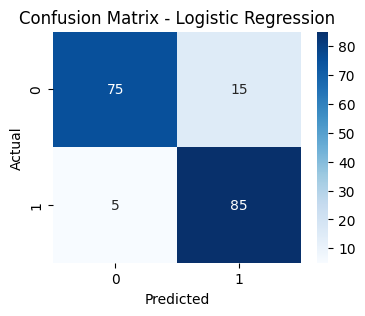

In [13]:
# ============================================
# Assignment 4: Raisin Variety Classification
# Dataset: Raisin_Dataset.xlsx
# Task: Train an AI model to predict Classes
# Method: Logistic Regression (80:20 split, 5-fold CV)
# ============================================

# Step 1: Install and import libraries
!pip install openpyxl --quiet

import pandas as pd
import numpy as np
from google.colab import files
import io

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Upload dataset
uploaded = files.upload()
fname = next(iter(uploaded))
data = pd.read_excel(io.BytesIO(uploaded[fname]))

# Step 3: Explore dataset
print("Shape:", data.shape)
display(data.head())
print("\nClass counts:\n", data['Class'].value_counts())

# Step 4: Encode labels (Kecimen = 0, Besni = 1)
le = LabelEncoder()
data['Class_enc'] = le.fit_transform(data['Class'])
print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

# Step 5: Split features and labels
X = data.drop(columns=['Class', 'Class_enc'])
y = data['Class_enc']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train size:", X_train.shape, "Test size:", X_test.shape)

# Step 6: Pipeline (Scaler + Logistic Regression) with 5-fold CV
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=2000, random_state=42))
])

cv_scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy')
print("5-fold CV scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

# Step 7: Train and evaluate on test set
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()
